In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Example DataFrame with categories and frequency columns
data = {
    'categories': ['A', 'B', 'C', 'D', 'E'],
    'frequency': [10, 15, 7, 20, 5]
}

df = pd.DataFrame(data)
df

,categories,frequency
0,A,10
1,B,15
2,C,7
3,D,20
4,E,5


/tmp/ipykernel_27/4042228807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette='Blues')


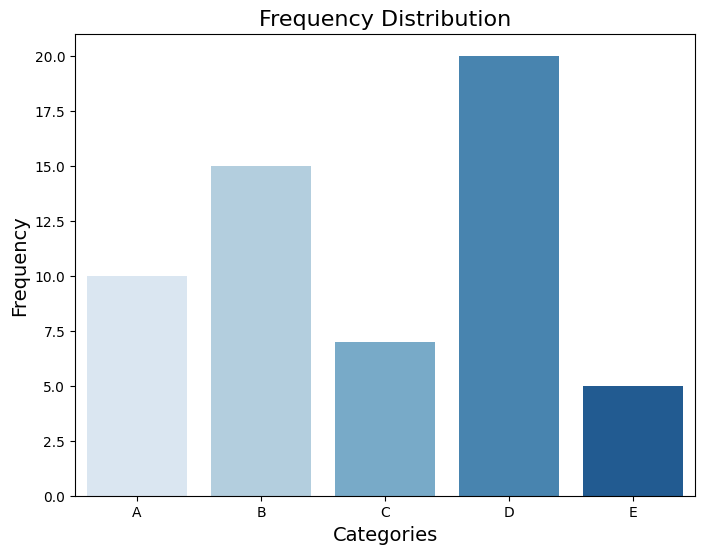

In [8]:
# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='categories', y='frequency', data=df, palette='Blues')

# Customize the plot
plt.title('Frequency Distribution', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

/tmp/ipykernel_27/3292768352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette=palette)
/tmp/ipykernel_27/3292768352.py:5: UserWarning: The palette list has more values (50) than needed (5), which may not be intended.
  sns.barplot(x='categories', y='frequency', data=df, palette=palette)


<Axes: xlabel='categories', ylabel='frequency'>

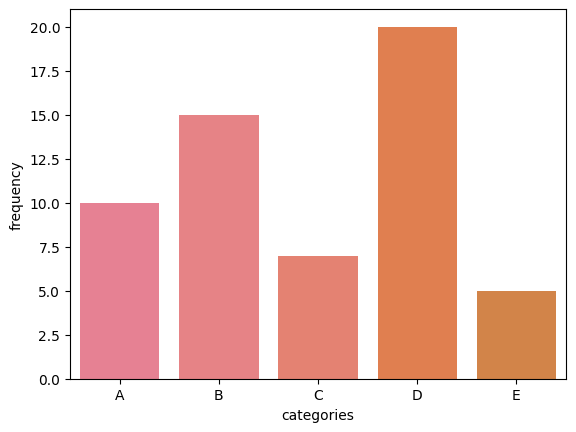

In [22]:
# Generate a palette with 50 distinct colors using 'husl'
palette = sns.color_palette("husl", 50)

# Apply this palette to your plot
sns.barplot(x='categories', y='frequency', data=df, palette=palette)

/tmp/ipykernel_27/907703428.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette=palette)


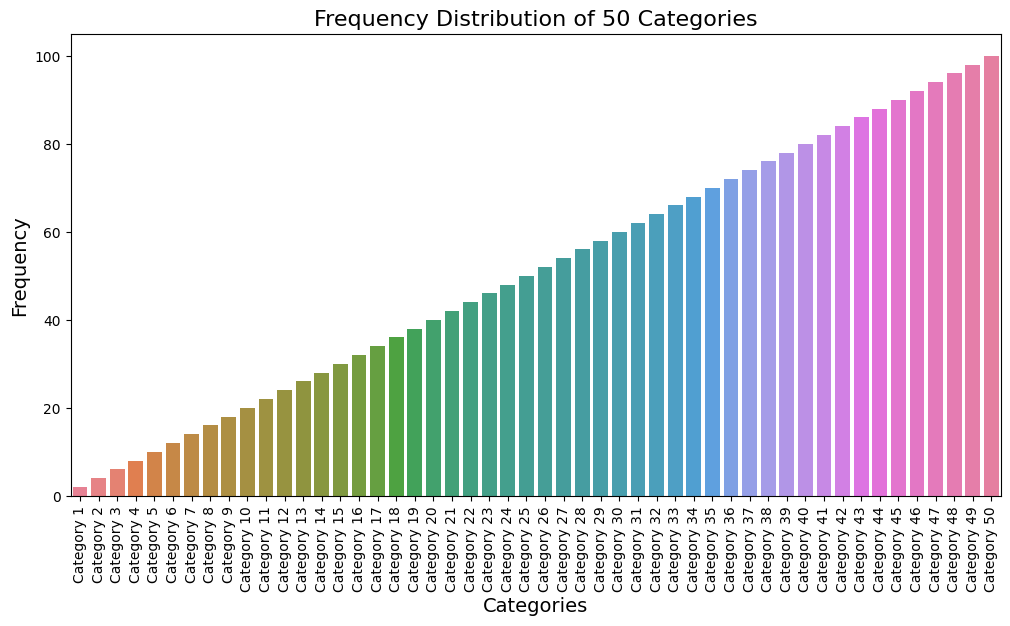

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset with 50 categories
data = {
    'categories': [f'Category {i}' for i in range(1, 51)],
    'frequency': [i*2 for i in range(1, 51)]
}

df = pd.DataFrame(data)

# Generate a palette with 50 distinct colors using 'husl'
palette = sns.color_palette("husl", 50)

# Plot using the palette
plt.figure(figsize=(12, 6))
sns.barplot(x='categories', y='frequency', data=df, palette=palette)

# Customize plot
plt.title('Frequency Distribution of 50 Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_27/3239035364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categories', y='frequency', data=df, palette="Spectral")


<Axes: xlabel='categories', ylabel='frequency'>

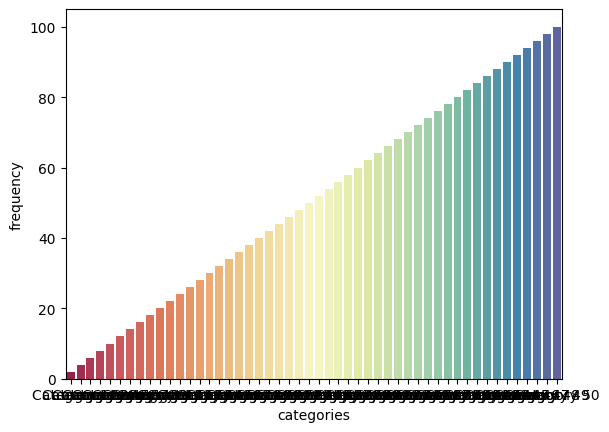

In [34]:
# Apply this palette to your plot
sns.barplot(x='categories', y='frequency', data=df, palette="Spectral")

/tmp/ipykernel_25/1259428791.py:96: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='dates', y='frequency', data=df, palette="YlGnBu")
/tmp/ipykernel_25/1259428791.py:127: UserWarning: Mismatched number of handles and labels: len(handles) = 12 len(labels) = 1
  plt.legend(handles=handles, labels=labels)
/tmp/ipykernel_25/1259428791.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(formatted_labels)


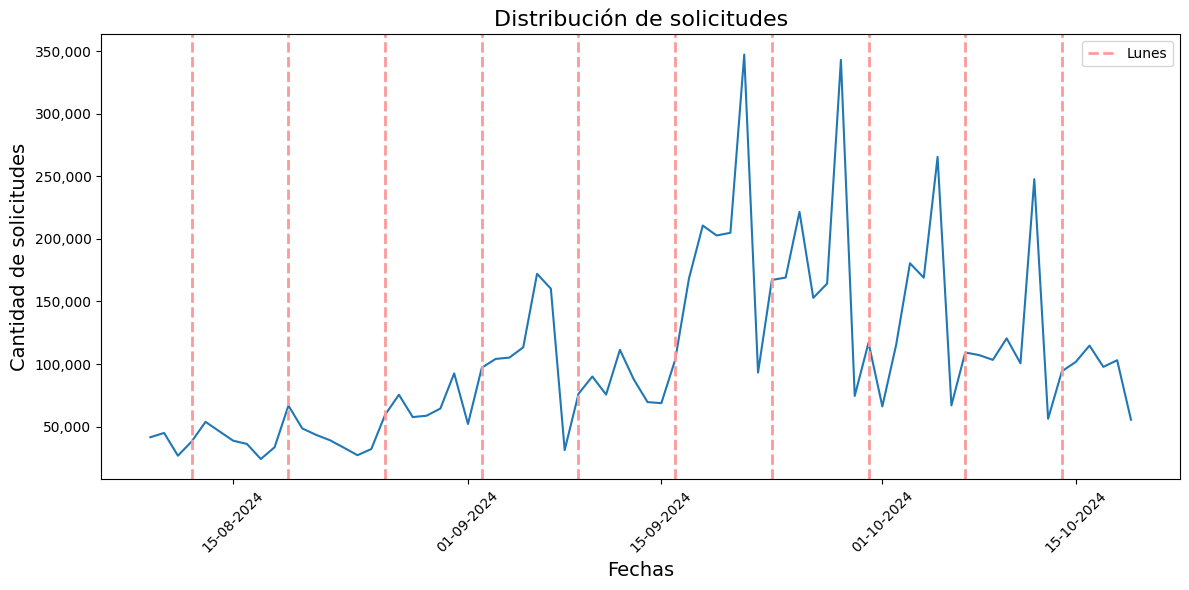

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Example data
vals = [
41477,
44901,
26721,
38193,
53773,
46202,
38710,
36096,
24062,
33504,
66731,
48535,
43393,
39129,
33209,
27111,
32046,
59451,
75443, # 27 aug
57598,
58666,
64419,
92510,
52042, # 1 sep
97040,
104068,
105133,
113337,
172109,
160237,
31235,
76119,
90040,
75590,
111349,
87784,
69560,
68722, # 15 sep
103329,
168417,
210665,
202737,
204891,
347344,
93147,
167166,
169121,
221606,
152871,
164288,
343060,
74519,
117053, # 30 sep
66132,
115334,
180532,
169002,
265529,
66938,
109211,
107155,
103310,
120509,
100595,
247737,
56223,
94202,
101642, # 15 oct
114736,
97715,
103034,
55480,
]

# Generate dates for the x-axis 
dates = pd.date_range(start='2024-08-09', periods=72, freq='D')

data = {
    'dates': dates,
    'frequency': vals
}

df = pd.DataFrame(data)

df['dates'] = pd.to_datetime(df['dates'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='dates', y='frequency', data=df, palette="YlGnBu")


# Formatter function to add commas to y-tick labels
def format_with_commas(x, pos):
    return f"{x:,.0f}"

# Set the y-axis formatter to use commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

# Set y-axis to logarithmic scale
#plt.yscale('log')

# Find all Mondays in the date column
mondays = df[df['dates'].dt.weekday == 0]['dates']

# Add vertical lines for each Monday
for monday in mondays:
    plt.axvline(x=monday, color="#fb9a99", linestyle='--', lw=2, label="Lunes")

# To avoid duplicate labels in the legend, handle the legend manually
handles, labels = plt.gca().get_legend_handles_labels()

# Remove duplicate labels (only keep the first occurrence)
handles = [handles[0]]  # We only keep the first vertical line's handle
labels = [labels[0]]  # Corresponding label for the first vertical line

# Add the rest of the original labels (from the lineplot)
handles.extend(plt.gca().get_lines())

# Display the custom legend
plt.legend(handles=handles, labels=labels)

# Customize plot
plt.title('Distribución de solicitudes', fontsize=16)
plt.xlabel('Fechas', fontsize=14)
plt.ylabel('Cantidad de solicitudes', fontsize=14)

# Set the x-axis date format
labels = [label.get_text() for label in plt.gca().get_xticklabels()]
formatted_labels = [pd.to_datetime(label).strftime('%d-%m-%Y') for label in labels]

plt.gca().set_xticklabels(formatted_labels)

# Rotate the date labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
#plt.legend(title='Tipo de dominio')

#plt.show()

plt.savefig('1-timeline.png', bbox_inches='tight')


In [32]:
sum(vals)

7511475

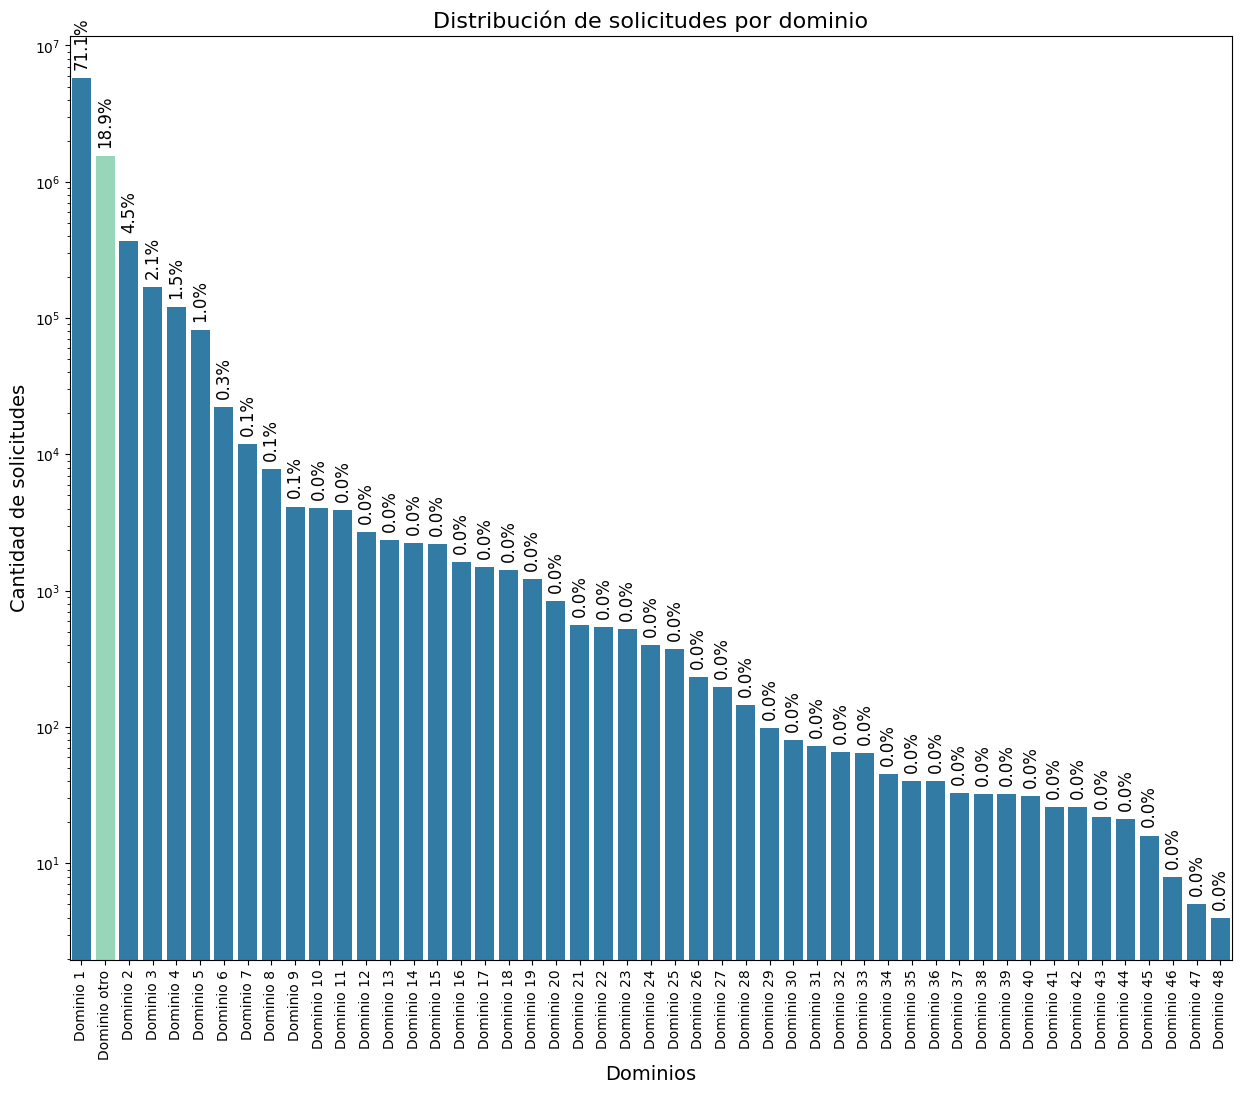

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

vals = [
5812121,
1543472,
370235,
168335,
121492,
81461,
22140,
11953,
7803,
4148,
4038,
3891,
2681,
2348,
2235,
2214,
1615,
1500,
1430,
1215,
842,
561,
545,
526,
400,
372,
234,
196,
145,
98,
80,
72,
66,
65,
45,
40,
40,
33,
32,
32,
31,
26,
26,
22,
21,
16,
8,
5,
4,
]
data = {
    'categories': [f'Dominio {i}' for i in range(1, 49)],
    'frequency': vals
}

data['categories'][1:1]  = ['Dominio otro'] 

df = pd.DataFrame(data)

#blues = sns.color_palette("Blues", n_colors=7)  # two colors, one for each value
colors = sns.color_palette("YlGnBu", n_colors=2) 

# Plot using the palette
#plt.figure(figsize=(12, 6))
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='categories', y='frequency', data=df, color=colors[1])

ax.patches[1].set_facecolor(colors[0])  # Change color of the second bar

# Calculate the total sum of all values across both 'type1' and 'type2'
total_sum = df['frequency'].sum()


# Add percentages above each bar
for i in range(len(df)):
    # The height of the first stack bar (type1) and the second stack bar (type2)
    total_height = df['frequency'][i]

    # Calculate percentages 
    perc = (df['frequency'][i] / total_sum) * 100
    
    # Place the text above the stacked bars
    plt.text(i, total_height + 0.15 * total_height, f'{perc:.1f}%', 
             ha='center', va='bottom', fontsize=12, rotation=90)

plt.yscale('log')

# Customize plot
plt.title('Distribución de solicitudes por dominio', fontsize=16)
plt.xlabel('Dominios', fontsize=14)
plt.ylabel('Cantidad de solicitudes', fontsize=14)
plt.xticks(rotation=90)
#plt.show()
plt.savefig('2-domain_dist.png', bbox_inches='tight')

In [66]:
# Calculate total count
total_count = df['frequency'].sum()

# Transform counts into percentages
df['percentage'] = (df['frequency'] / total_count) * 100



In [67]:
df

,categories,frequency,percentage
0,Dominio 1,5812121,71.131869
1,Dominio otro,1543472,18.889842
2,Dominio 2,370235,4.531135
3,Dominio 3,168335,2.060174
4,Dominio 4,121492,1.486885
5,Dominio 5,81461,0.996964
6,Dominio 6,22140,0.270961
7,Dominio 7,11953,0.146287
8,Dominio 8,7803,0.095497
9,Dominio 9,4148,0.050765


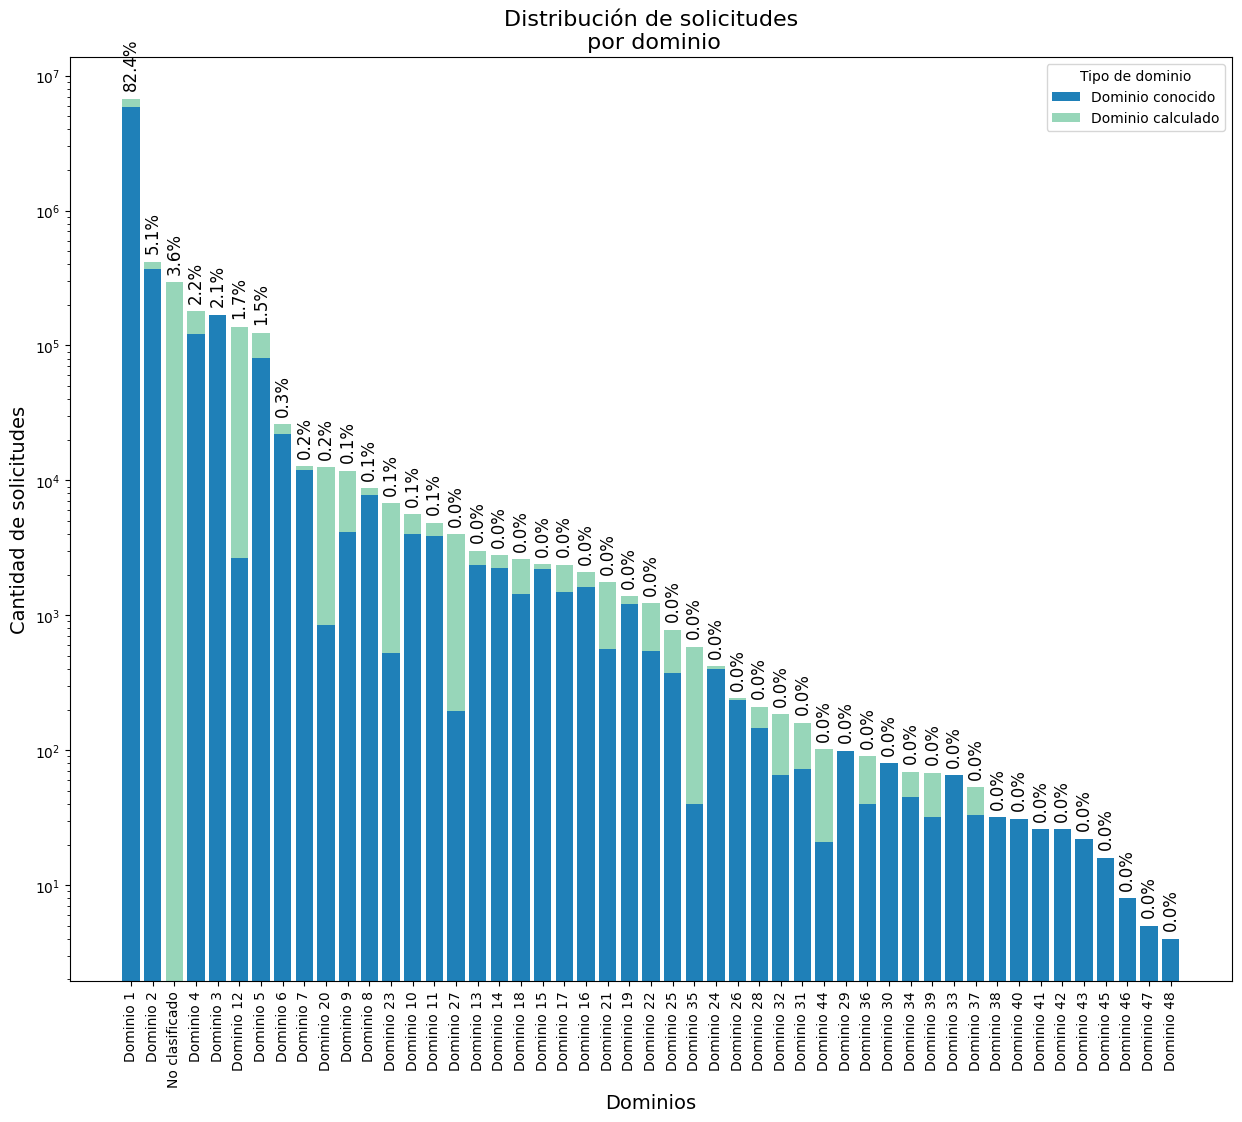

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for the stacked bar plot
known = [
5812121,
370235,
0,
121492,
168335,
2681,
81461,
22140,
11953,
842,
4148,
7803,
526,
4038,
3891,
196,
2348,
2235,
1430,
2214,
1500,
1615,
561,
1215,
545,
372,
40,
400,
234,
145,
66,
72,
21,
98,
40,
80,
45,
32,
65,
33,
32,
31,
26,
26,
22,
16,
8,
5,
4,
]

pred = [
919503,
47251,
294075,
57182,
1129,
135582,
42483,
3842,
765,
11660,
7672,
980,
6233,
1568,
961,
3801,
674,
560,
1184,
167,
879,
471,
1200,
173,
682,
412,
545,
19,
9,
65,
119,
88,
81,
1,
50,
0,
24,
36,
0,
20,
0,
0,
0,
0,
0,
0,
0,
0,
0,
]

categs = [
"Dominio 1",
"Dominio 2",
"No clasificado",
"Dominio 4",
"Dominio 3",
"Dominio 12",
"Dominio 5",
"Dominio 6",
"Dominio 7",
"Dominio 20",
"Dominio 9",
"Dominio 8",
"Dominio 23",
"Dominio 10",
"Dominio 11",
"Dominio 27",
"Dominio 13",
"Dominio 14",
"Dominio 18",
"Dominio 15",
"Dominio 17",
"Dominio 16",
"Dominio 21",
"Dominio 19",
"Dominio 22",
"Dominio 25",
"Dominio 35",
"Dominio 24",
"Dominio 26",
"Dominio 28",
"Dominio 32",
"Dominio 31",
"Dominio 44",
"Dominio 29",
"Dominio 36",
"Dominio 30",
"Dominio 34",
"Dominio 39",
"Dominio 33",
"Dominio 37",
"Dominio 38",
"Dominio 40",
"Dominio 41",
"Dominio 42",
"Dominio 43",
"Dominio 45",
"Dominio 46",
"Dominio 47",
"Dominio 48",

]

# Create the dataframe
data = {
    #'categories': [f'Dominio {i}' for i in range(1, 50)],  # 'Dominio 1', 'Dominio 2', 'Dominio 3'
    'categories': categs,
    'known': known,
    'pred': pred,
}


# Change the last category to "Other"
#data['categories'][3] = 'No clasificado'  # Replace 'Dominio 3' with 'Other'

df = pd.DataFrame(data)

# Use a muted color palette
colors = sns.color_palette("YlGnBu", n_colors=2)  # two colors, one for each value

# Plot stacked bar chart
plt.figure(figsize=(15, 12))

# Plot the first stack (type1)
plt.bar(df['categories'], df['known'], label='Dominio conocido', color=colors[1])

# Plot the second stack (type2), stacked on top of type1
plt.bar(df['categories'], df['pred'], bottom=df['known'], label='Dominio calculado', color=colors[0])


# Calculate the total sum of all values across both 'type1' and 'type2'
total_sum = df['known'].sum() + df['pred'].sum()

max_height = 0
# Add percentages above each bar
for i in range(len(df)):
    # The height of the first stack bar (type1) and the second stack bar (type2)
    total_height = df['known'][i] + df['pred'][i]
    if total_height > max_height:
        max_height = total_height
    
    # Calculate percentages for type1 and type2
    perc1 = (df['known'][i] / total_sum) * 100
    perc2 = (df['pred'][i] / total_sum) * 100
    
    # Place the text above the stacked bars
    plt.text(i, total_height + 0.15 * total_height, f'{perc1 + perc2:.1f}%', 
             ha='center', va='bottom', fontsize=12, rotation=90)


plt.yscale('log')

# Customize plot
plt.title('Distribución de solicitudes\n por dominio', fontsize=16)
plt.xlabel('Dominios', fontsize=14)
plt.ylabel('Cantidad de solicitudes', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Tipo de dominio')

#plt.show()

plt.savefig('3-ground_truth.png', bbox_inches='tight')

In [ ]:
# Calculate total count
#total_count = df['frequency'].sum()

# Transform counts into percentages
#df['percentage'] = (df['frequency'] / total_count) * 100

In [3]:
df

,categories,known,pred
0,Dominio 1,5812121,919503
1,Dominio 2,370235,47251
2,No clasificado,0,294075
3,Dominio 4,121492,57182
4,Dominio 3,168335,1129
5,Dominio 12,2681,135582
6,Dominio 5,81461,42483
7,Dominio 6,22140,3842
8,Dominio 7,11953,765
9,Dominio 20,842,11660
